In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import RocCurveDisplay

**Importing the dataset**

In [2]:
data=pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [6]:
X=data.drop(columns=['Purchased','User ID'])
Y=data['Purchased']

In [7]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [8]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

**Feature Scaling**

In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [11]:
x_train

array([[ 1.04475034, -0.03449842,  0.26845438],
       [ 1.04475034,  0.06066963, -0.25929212],
       [ 1.04475034, -1.65235532,  0.12185813],
       [ 1.04475034, -0.98617895,  0.53232764],
       [-0.95716648, -1.36685117, -1.22682738],
       [-0.95716648, -0.51033869,  0.47368914],
       [ 1.04475034, -1.55718727,  0.53232764],
       [ 1.04475034, -0.8910109 ,  0.56164689],
       [-0.95716648, -1.74752338, -1.28546588],
       [ 1.04475034, -0.60550674,  0.18049663],
       [ 1.04475034,  1.77369459, -0.28861137],
       [-0.95716648, -0.60550674, -0.05405737],
       [ 1.04475034, -0.22483453, -1.40274288],
       [-0.95716648,  2.05919875, -0.81635787],
       [-0.95716648, -1.08134701,  0.29777364],
       [ 1.04475034, -1.84269143, -0.52316537],
       [-0.95716648,  1.48819043,  1.00143564],
       [ 1.04475034, -0.98617895,  0.59096614],
       [-0.95716648, -0.60550674,  0.03390038],
       [ 1.04475034, -0.70067479,  0.29777364],
       [ 1.04475034, -0.8910109 ,  0.268

**Fitting SVM to the Training set**

In [12]:
clf=svm.SVC(kernel='rbf',gamma='scale')
clf.fit(x_train,y_train)

SVC()

**Predicting the Test set results**

In [13]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

**Making the Confusion Matrix**

In [14]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,47,5,52
1,2,26,28
All,49,31,80


**Visualising the Training set results**

In [15]:
training_score = clf.score(x_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 90.625


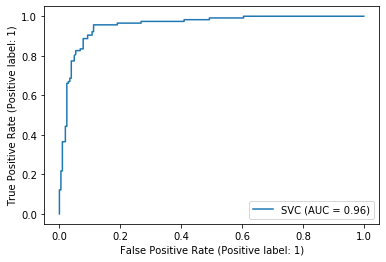

In [18]:
RocCurveDisplay.from_estimator(clf,x_train,y_train)

**Visualising the Test set results**

In [16]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 91.25


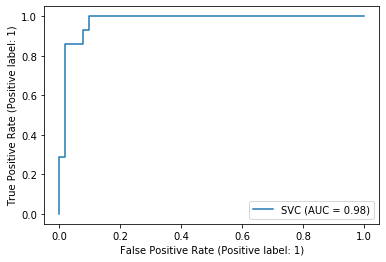

In [17]:
RocCurveDisplay.from_estimator(clf,x_test,y_test)